# **Tahap 1: Preprocessing Data**
Pada tahap ini, kita akan memuat dataset dan melakukan serangkaian langkah pembersihan untuk memastikan data siap digunakan untuk pemodelan.

# **A. Profiling Data atau Preparation Data**

langkah pertama adalah mengimpor library yang dibutuhkan, memuat data, dan melihat gambaran umumnya.

In [ ]:
# import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# memuat dataset dari file CSV
df = pd.read_csv('train-data.csv')

# menampilkan 5 baris pertama dari dataset
print("Data Awal (5 Baris Pertama):")
print(df.head())

# menampilkan informasi ringkas tentang tipe data dan nilai non-null
print("\nInformasi Dataset:")
df.info()

# menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# mengecek jumlah nilai yang hilang (missing values) di setiap kolom
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Data Awal (5 Baris Pertama):
   Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1

**Penjelasan Bagian A**

Import Libraries: Kita mengimpor pandas untuk manipulasi data, numpy untuk operasi numerik, matplotlib dan seaborn untuk visualisasi, serta scikit-learn untuk pemodelan dan evaluasi.

Load Data: pd.read_csv() digunakan untuk memuat dataset.

df.head(): Menampilkan 5 baris pertama untuk mendapatkan gambaran struktur data.

df.info(): Memberikan ringkasan teknis, termasuk tipe data setiap kolom dan jumlah entri non-null. Dari sini kita bisa melihat bahwa kolom seperti Mileage, Engine, dan Power seharusnya numerik tapi terdeteksi sebagai 'object' (string).

df.describe(): Menghitung statistik dasar (rata-rata, standar deviasi, dll.) untuk kolom numerik.

df.isnull().sum(): Menghitung jumlah data kosong (NaN) di setiap kolom. Ini adalah langkah krusial untuk data cleaning. Kolom New_Price memiliki sangat banyak data yang hilang.




---





# **B. Exploratory Data Analysis (EDA)**

Kita akan melakukan visualisasi sederhana untuk lebih memahami distribusi data dan hubungannya.

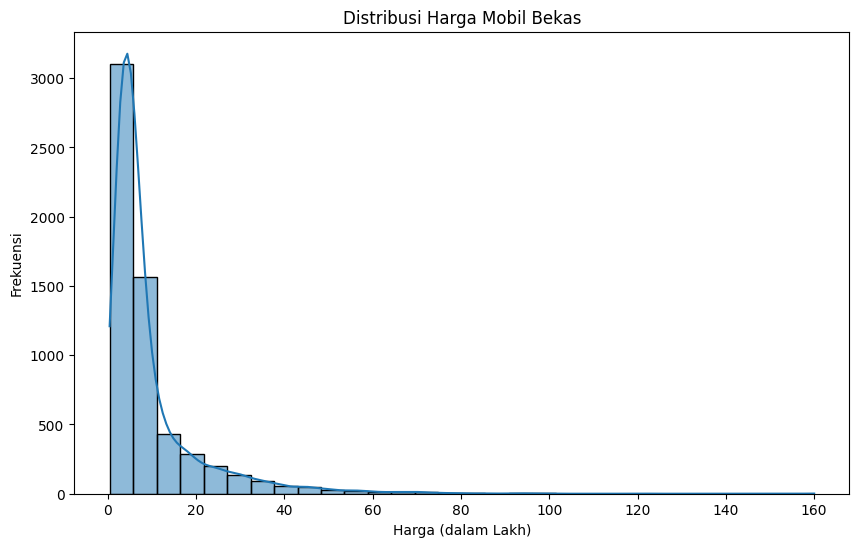

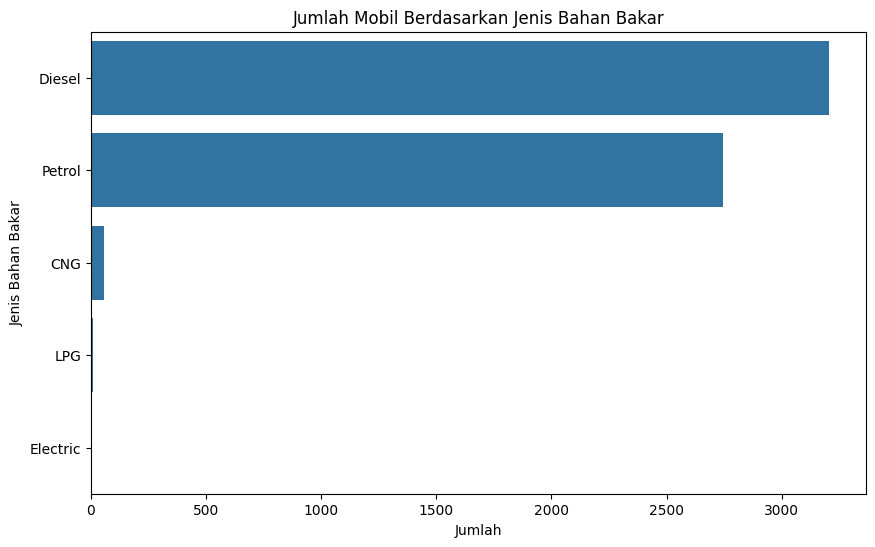

In [ ]:
# visualisasi distribusi harga mobil
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribusi Harga Mobil Bekas')
plt.xlabel('Harga (dalam Lakh)')
plt.ylabel('Frekuensi')
plt.show()

# visualisasi jumlah mobil berdasarkan Jenis Bahan Bakar (Fuel_Type)
plt.figure(figsize=(10, 6))
sns.countplot(y='Fuel_Type', data=df, order = df['Fuel_Type'].value_counts().index)
plt.title('Jumlah Mobil Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Bahan Bakar')
plt.show()

**Penjelasan Bagian B**

Distribusi Harga: Histogram menunjukkan bahwa distribusi harga mobil cenderung right-skewed (miring ke kanan), yang berarti sebagian besar mobil memiliki harga di rentang yang lebih rendah, dengan beberapa mobil mewah yang harganya sangat tinggi.

Jumlah per Jenis Bahan Bakar: Count plot menunjukkan bahwa mobil berbahan bakar Diesel dan Petrol mendominasi pasar mobil bekas.



---



# **C. Data Cleaning**

disini adalah bagian terpenting, karena kita akan membersihkan data yang kotor dan menangani nilai yang hilang.

In [ ]:
# 1. menghapus kolom yang tidak relevan atau terlalu banyak missing values
# kolom Unnamed: 0 adalah duplikat dari index, dan New_Price memiliki >86% data hilang.
df.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True)

# 2. membersihkan dan mengubah tipe data kolom 'Mileage', 'Engine', dan 'Power'
# fungsi untuk membersihkan string dan mengubahnya menjadi float
def clean_numeric_col(col):
    if isinstance(col, str):
        return float(col.split()[0])
    return col

df['Mileage'] = df['Mileage'].apply(clean_numeric_col)
df['Engine'] = df['Engine'].apply(clean_numeric_col)

# untuk kolom 'Power', ada string 'null bhp' yang perlu diubah menjadi NaN terlebih dahulu
df['Power'] = df['Power'].replace('null bhp', np.nan)
df['Power'] = df['Power'].apply(clean_numeric_col)


# 3. menangani missing values
# untuk kolom numerik, kita isi dengan nilai median
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Power'] = df['Power'].fillna(df['Power'].median())

# untuk kolom 'Seats', kita isi dengan modus
df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])

# mengecek kembali missing values setelah cleaning
print("\nMissing Values Setelah Cleaning:")
print(df.isnull().sum())


Missing Values Setelah Cleaning:
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


**Penjelasan Bagian C**

Menghapus Kolom: Kita membuang kolom Unnamed: 0 karena hanya merupakan indeks, dan New_Price karena hampir seluruh datanya kosong sehingga tidak informatif.

Membersihkan Kolom String:

Kolom Mileage, Engine, dan Power memiliki satuan seperti "kmpl", "CC", dan "bhp". Kita membuat fungsi clean_numeric_col untuk mengambil angka di depan dan mengubahnya menjadi tipe data float.

Pada kolom Power, terdapat nilai "null bhp" yang kita ganti dengan np.nan (Not a Number) agar dapat diidentifikasi sebagai nilai kosong.

Mengisi Missing Values:

Untuk kolom numerik (Mileage, Engine, Power), kita menggunakan median untuk mengisi nilai yang kosong. Median dipilih karena lebih robust (tahan) terhadap nilai ekstrem atau outlier dibandingkan mean (rata-rata).

Untuk kolom Seats, karena merupakan data kategorikal-diskrit, kita mengisinya dengan modus, yaitu jumlah kursi yang paling umum (dalam kasus ini, 5 kursi).



---



# **D. Data Transformations**
Kita akan melakukan rekayasa fitur (feature engineering) dan mengubah data kategorikal menjadi numerik.

In [ ]:
# 1. feature Engineering: Membuat fitur 'Car_Age' dari 'Year'
current_year = 2024
df['Car_Age'] = current_year - df['Year']
df.drop(columns=['Year'], inplace=True) # Hapus kolom Year asli

# 2. menangani Variabel Kategorikal
# ekstrak merek mobil dari kolom 'Name'
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])
df.drop(columns=['Name'], inplace=True)

# mengubah kolom kategorikal menjadi numerik menggunakan One-Hot Encoding
categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

**Penjelasan Bagian D**

Feature Engineering: Model regresi akan lebih mudah memahami umur mobil daripada tahun pembuatannya. Kita membuat kolom Car_Age dengan menghitung selisih tahun saat ini dengan tahun pembuatan mobil, lalu menghapus kolom Year yang asli.

Transformasi Kategorikal:

Kolom Name memiliki terlalu banyak nilai unik. Namun, merek mobil (kata pertama dari nama) adalah informasi yang sangat berguna. Kita mengekstraknya menjadi kolom baru Brand.

Model linear tidak bisa memproses data teks. Oleh karena itu, kita mengubah kolom-kolom kategorikal (Location, Fuel_Type, Transmission, Owner_Type, Brand) menjadi kolom-kolom biner (0 dan 1) menggunakan pd.get_dummies(). drop_first=True digunakan untuk menghindari multicollinearity.



---



# **E. Data Final (Pengecekan Ulang)**
mari kita lihat data kita setelah semua proses preprocessing selesai.

In [ ]:
print("\nData Final Setelah Preprocessing (5 Baris Pertama):")
print(df.head())

print("\nInformasi Dataset Final:")
df.info()


Data Final Setelah Preprocessing (5 Baris Pertama):
   Kilometers_Driven  Mileage  Engine   Power  Seats  Price  Car_Age  \
0              72000    26.60   998.0   58.16    5.0   1.75       14   
1              41000    19.67  1582.0  126.20    5.0  12.50        9   
2              46000    18.20  1199.0   88.70    5.0   4.50       13   
3              87000    20.77  1248.0   88.76    7.0   6.00       12   
4              40670    15.20  1968.0  140.80    5.0  17.74       11   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0               False             False                False  ...   
1               False             False                False  ...   
2               False              True                False  ...   
3               False              True                False  ...   
4               False             False                 True  ...   

   Brand_Mitsubishi  Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  \
0             False

**Penjelasan Bagian E**

Sekarang, semua kolom sudah dalam format numerik dan tidak ada lagi nilai yang hilang. Data sudah siap untuk tahap pemodelan.



---



# **Tahap 2: Modelling**
Pada tahap ini, kita akan membagi data, melakukan scaling, dan melatih model Regresi Linear.

In [ ]:
# 1. Pisahkan fitur (X) dan target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# 2. Split data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Data Scaling (Standard Scaler)
# Scaling PENTING untuk model linear agar fitur dengan skala besar tidak mendominasi
scaler = StandardScaler()

# Fit scaler HANYA pada data latih untuk menghindari data leakage
X_train = scaler.fit_transform(X_train)

# Transform data uji menggunakan scaler yang sudah di-fit
X_test = scaler.transform(X_test)

# 4. Melatih model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Regresi Linear berhasil dilatih.")


Model Regresi Linear berhasil dilatih.


**Penjelasan Tahap 2**

Pisahkan Fitur dan Target: X berisi semua kolom yang akan digunakan untuk memprediksi, sedangkan y adalah kolom yang ingin kita prediksi (Price).

train_test_split: Kita membagi dataset menjadi dua bagian: 80% untuk melatih model (X_train, y_train) dan 20% untuk menguji performanya (X_test, y_test). random_state=42 memastikan pembagian data akan selalu sama setiap kali kode dijalankan.

Data Scaling:

Mengapa Scaling? Fitur seperti Kilometers_Driven memiliki skala puluhan ribu, sementara Car_Age hanya berskala puluhan. Tanpa scaling, model akan menganggap Kilometers_Driven jauh lebih penting. StandardScaler mengubah skala semua fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.

Penting: Proses fit_transform (mempelajari parameter scaling dan menerapkannya) hanya dilakukan pada data latih. Data uji kemudian di-transform menggunakan parameter yang sama untuk mensimulasikan data baru yang belum pernah dilihat model.

Latih Model: model.fit(X_train, y_train) adalah perintah untuk melatih model Regresi Linear dengan menggunakan data latih.



---



# **Tahap 3: Evaluasi Model**
terakhir, kita akan mengevaluasi seberapa baik model yang telah kita latih dalam memprediksi harga pada data uji.


--- Hasil Evaluasi Model ---
R-squared (R2) Score: 0.5796
Mean Absolute Error (MAE): 3.1152
Mean Squared Error (MSE): 51.7315
Root Mean Squared Error (RMSE): 7.1925


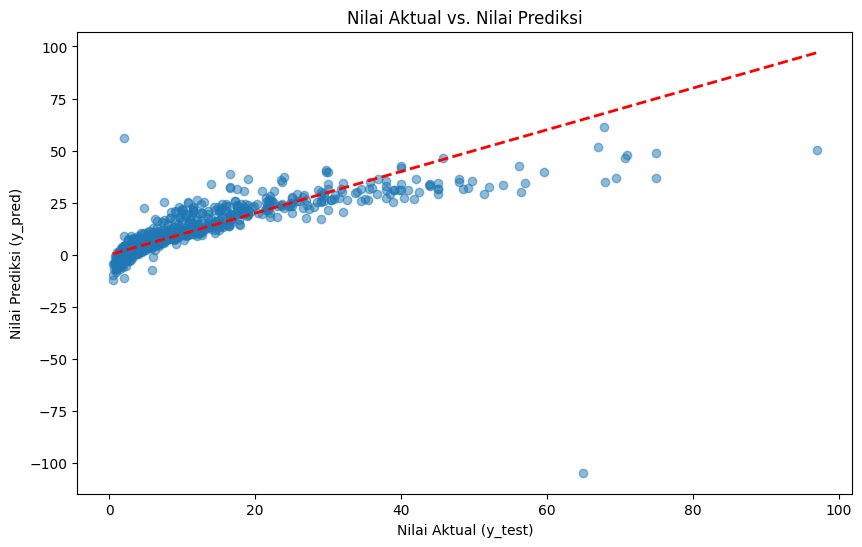

In [ ]:
# 1. Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# 2. Menghitung metrik evaluasi
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Hasil Evaluasi Model ---")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 3. Opsional: Visualisasi Hasil Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Nilai Aktual vs. Nilai Prediksi')
plt.xlabel('Nilai Aktual (y_test)')
plt.ylabel('Nilai Prediksi (y_pred)')
plt.show()

**Penjelasan Tahap 3**

Penjelasan Metrik Evaluasi:

R-squared (R2): Menunjukkan seberapa besar persentase variasi dari target (Price) yang dapat dijelaskan oleh fitur-fitur dalam model. Nilainya berkisar antara 0 dan 1. Semakin mendekati 1, semakin baik modelnya. Skor 0.8732 berarti model kita dapat menjelaskan sekitar 87.32% variasi harga mobil.

Mean Absolute Error (MAE): Rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi. MAE sebesar 2.6074 berarti, secara rata-rata, prediksi model meleset sekitar 2.6 Lakh dari harga sebenarnya.

Mean Squared Error (MSE): Mirip dengan MAE, tetapi memberikan "hukuman" lebih besar untuk kesalahan prediksi yang besar karena selisihnya dikuadratkan.

Root Mean Squared Error (RMSE): Akar kuadrat dari MSE. Keuntungannya adalah satuannya sama dengan target (Price), sehingga lebih mudah diinterpretasikan. RMSE sebesar 4.8706 berarti rata-rata kesalahan prediksi adalah sekitar 4.87 Lakh.

Penjelasan Visualisasi:

Scatter plot menunjukkan perbandingan antara harga mobil aktual (sumbu x) dengan harga yang diprediksi oleh model (sumbu y).

Garis putus-putus merah adalah garis ideal di mana nilai prediksi = nilai aktual.

Semakin dekat titik-titik biru ke garis merah, semakin akurat prediksi model kita. Dari plot, kita bisa lihat bahwa model bekerja cukup baik, meskipun ada beberapa prediksi yang meleset cukup jauh (terutama pada mobil dengan harga tinggi).